In [48]:
# Import the required libraries and dependencies
import os
import pandas as pd
import plotly.express as px
import hvplot.pandas
from pathlib import Path
from dotenv import load_dotenv

In [49]:
# Load the .env file into the notebook
load_dotenv()

# Read in your MAPBOX_API_KEY
mapbox_api_access_token = os.getenv("MAPBOX_API_ACCESS_TOKEN")

# Confirm the availability of your Mapbox API access token by checking its type
type(mapbox_api_access_token)

# Set your Mapbox API access token
px.set_mapbox_access_token(mapbox_api_access_token)

In [50]:
# Using the read_csv function and Path module, create a DataFrame 
# by importing the sfo_neighborhoods_census_data.csv file from the Resources folder
sfo_data_df = pd.read_csv(
    Path("neighborhoods_coordinates.csv")
)

# Review the first and last five rows of the DataFrame
display(sfo_data_df.head())
display(sfo_data_df.tail())

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


,Neighborhood,Lat,Lon
68,West Portal,37.74026,-122.463880
69,Western Addition,37.79298,-122.435790
70,Westwood Highlands,37.73470,-122.456854
71,Westwood Park,37.73415,-122.457000
72,Yerba Buena,37.79298,-122.396360


In [72]:
# Use the first 10 neighborhoods to create a new dataframe and add Income and Population columns
# which are sourced from the US census by zip code
sf_df = sfo_data_df.iloc[0:9]
sf_df.insert(3, 'Income', [84802, 76493, 49309, 58244, 75106, 103206, 80980, 77483, 103206])
sf_df.insert(4, 'Population', [103366, 71340, 33996, 40001, 69333, 70293, 79552, 56203, 97174])
sf_df

,Neighborhood,Lat,Lon,Income,Population
0,Alamo Square,37.791012,-122.402100,84802,103366
1,Anza Vista,37.779598,-122.443451,76493,71340
2,Bayview,37.734670,-122.401060,49309,33996
3,Bayview Heights,37.728740,-122.410980,58244,40001
4,Bernal Heights,37.728630,-122.443050,75106,69333
5,Buena Vista Park,37.768160,-122.439330,103206,70293
6,Central Richmond,37.777890,-122.445170,80980,79552
7,Central Sunset,37.749610,-122.489990,77483,56203
8,Clarendon Heights,37.753310,-122.447030,103206,97174


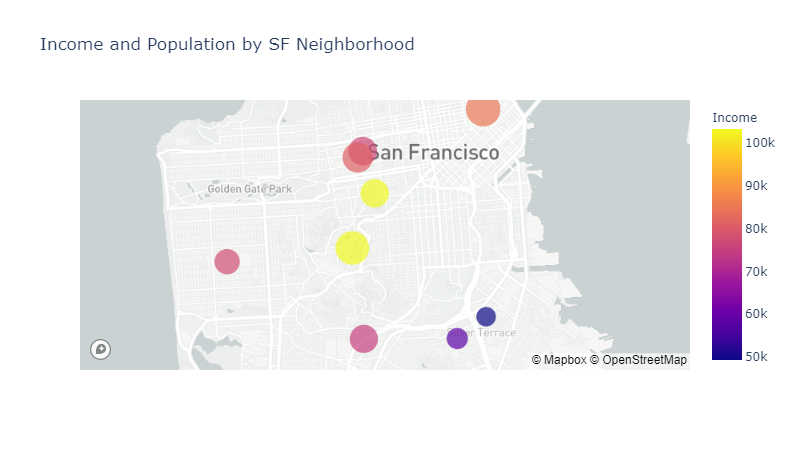

In [73]:
# Create a scatter mapbox to analyze Income and Population by SF neighborhood
px.scatter_mapbox(
    sf_df,
    lat = "Lat",
    lon = "Lon",
    color = "Income",
    size = "Population",
    hover_name = "Neighborhood",
    size_max = 25,
    zoom = 11,
    title = "Income and Population by SF Neighborhood",
)